In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
frd_data=pd.read_csv('Fraud_check.csv')
frd_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
frd_data.shape

(600, 6)

In [5]:
frd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
frd_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
frd_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
frd_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
frd_data.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [10]:
frd_data['status'] = frd_data['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [11]:
frd_data.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [12]:
frd_data=frd_data.drop(columns=['Taxable.Income'])
frd_data['Marital.Status']

0        Single
1      Divorced
2       Married
3        Single
4       Married
         ...   
595    Divorced
596    Divorced
597    Divorced
598     Married
599    Divorced
Name: Marital.Status, Length: 600, dtype: object

In [13]:
frd_data['Marital.Status']=frd_data['Marital.Status'].astype(str)


In [14]:
frd_data['Marital.Status']=np.where((frd_data['Marital.Status']=='Single'),0,
                                    (np.where(frd_data['Marital.Status']=='Married',1,2)))



In [15]:
frd_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,NO,0,50047,10,YES,Good
1,YES,2,134075,18,YES,Good
2,NO,1,160205,30,YES,Good
3,YES,0,193264,15,YES,Good
4,NO,1,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,2,39492,7,YES,Good
596,YES,2,55369,2,YES,Good
597,NO,2,154058,0,YES,Good
598,YES,1,180083,17,NO,Good


In [16]:
frd_data['Undergrad']=np.where(frd_data['Undergrad']=='YES',1,0)

In [17]:
frd_data['Undergrad']

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [18]:
frd_data['Urban']=np.where(frd_data['Urban']=='YES',1,0)

In [19]:
frd_data.head(20)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,0,0,50047,10,1,Good
1,1,2,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,0,193264,15,1,Good
4,0,1,27533,28,0,Good
5,0,2,116382,0,0,Good
6,0,2,80890,8,1,Good
7,1,0,131253,3,1,Good
8,0,0,102481,12,1,Good
9,1,2,155482,4,1,Good


Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [20]:
frd_data['status']=frd_data['status'].astype(str)

In [21]:
frd_data['status']=np.where(frd_data['status']=='Good',1,0)
frd_data['status'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    0
17    1
18    1
19    0
Name: status, dtype: int32

In [22]:
x=frd_data.drop(['status'],axis=1)
y=frd_data['status']

In [23]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,2,39492,7,1
596,1,2,55369,2,1
597,0,2,154058,0,1
598,1,1,180083,17,0


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: status, Length: 600, dtype: int32

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

model= DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(x_train,y_train)

adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)

rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
logistic_model.coef_

array([[1.27341993e-04, 1.97947730e-03, 6.60651716e-06, 3.43500706e-02,
        1.12481665e-03]])

In [29]:
logistic_model.intercept_

array([0.00220626])

GRID SEARCH CV

In [33]:
grid_searchCv=GridSearchCV(estimator=model,
    param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7]},cv=5)
grid_searchCv.fit(x,y)  
    
print(grid_searchCv.best_params_)
print(grid_searchCv.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.7916666666666666


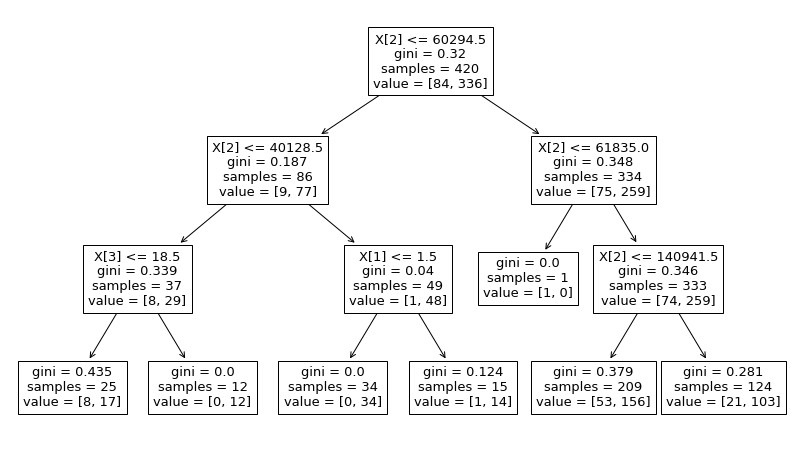

In [35]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(model)
plt.show()

train data

In [36]:
y_pred_train=adb_model.predict(x_train)

In [37]:
print(confusion_matrix(y_train,y_pred_train))

[[  5  79]
 [  0 336]]


In [40]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        84
           1       0.81      1.00      0.89       336

    accuracy                           0.81       420
   macro avg       0.90      0.53      0.50       420
weighted avg       0.85      0.81      0.74       420



In [41]:
accuracy_score(y_train,y_pred_train)

0.8119047619047619

test data

In [46]:
y_pred_test=adb_model.predict(x_test)
print(confusion_matrix(y_test,y_pred_test))

[[  0  40]
 [  1 139]]


In [48]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.78      0.99      0.87       140

    accuracy                           0.77       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.77      0.68       180



In [49]:
accuracy_score(y_test,y_pred_test)

0.7722222222222223

.....STACKING TECHNIQUE.....

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
log_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
voting_classifier=VotingClassifier(estimators=[('logistic_intel',log_model),
        ('decisiontree_intel', dt_model), ('svm_intel', svc_model)])
voting_classifier.fit(x_train,y_train)
y_pred=voting_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.7777777777777778

# ....THE END...